In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../csv/notas.csv")
df.columns = df.columns.str.strip()

In [9]:
# 2. Selecionar as colunas de interesse e renomeá-las
# É importante que os nomes das colunas 'AP1 (10,0)' e 'AP2 (10,0)'
# correspondam exatamente aos nomes no seu arquivo CSV.
df_notas = df[['AP1 (10,0)', 'AP2 (10,0)']].copy()
df_notas = df_notas.rename(columns={
    'AP1 (10,0)': 'HW1',
    'AP2 (10,0)': 'HW2'
})

# Agora, df_notas_selecionadas conterá apenas as colunas 'HW1' e 'HW2'
# com os dados das colunas originais.
print(df_notas.head())

   HW1  HW2
0  7,6  8,3
1  7,8  7,9
2  9,5  9,0
3  8,8  8,5
4  7,6  9,6


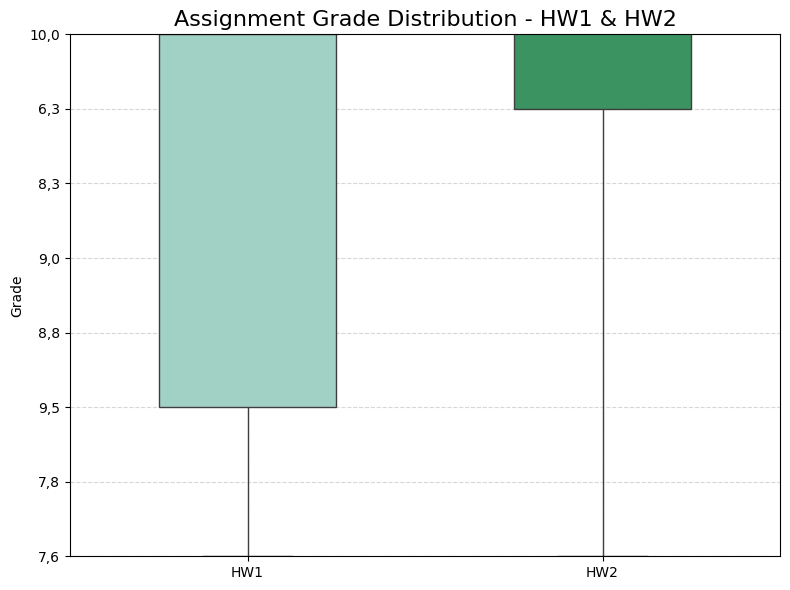

In [10]:
df_long = df_notas[['HW1', 'HW2']].melt(var_name='Avaliação', value_name='Nota')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Avaliação', y='Nota', data=df_long, palette=['#99d8c9', '#2ca25f'], hue='Avaliação', width=0.5)

plt.title('Assignment Grade Distribution - HW1 & HW2', fontsize=16)
plt.ylabel('Grade')
plt.xlabel('')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 7)  

plt.tight_layout()
plt.show()
